## DATA200 Final Project: CPI

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [3]:
#Use only the all items rows
CPI = pd.read_csv("CPI.csv")
CPI.columns = CPI.iloc[0]
CPI = CPI.drop(CPI.index[[0,1]]).head(1)
CPI.reset_index(drop=True, inplace=True)
CPI = CPI.iloc[:, 1:]
CPI

,Jan-76,Feb-76,Mar-76,Apr-76,May-76,Jun-76,Jul-76,Aug-76,Sep-76,Oct-76,...,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22
0,30.3,30.5,30.6,30.7,30.9,31.1,31.3,31.3,31.5,31.7,...,148.9,149.8,151.9,152.9,153.1,152.6,152.7,153.8,154,153.1


In [4]:
num_datasets = len(CPI.columns) // 12

# store datasets for each set of 12 columns
datasets_by_set = {}

for i in range(num_datasets):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    dataset_for_set = CPI.iloc[:, start_idx:end_idx]
    datasets_by_set[f"Dataset {i+1}"] = dataset_for_set

In [5]:
for dataset_name, dataset in datasets_by_set.items():
    # Transpose the dataset
    transposed_dataset = dataset.T  # Transpose to make years as rows
    
    # Convert the datatype of rows to numeric
    transposed_dataset = transposed_dataset.apply(pd.to_numeric, errors='coerce')

In [30]:
average_inflation_list = []

for dataset_name, dataset in datasets_by_set.items():
    # Convert the dataset to numeric, ignoring non-numeric values
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')
    average_inflation_rate = dataset_numeric.mean().mean()
    average_inflation_rate = round(average_inflation_rate, 2)

    # append
    average_inflation_list.append((dataset_name, average_inflation_rate))

#print(average_inflation_list)

In [7]:
# Extract years and rounded average inflation rates from the result
years = list(range(1976, 2022 + 1))  # Adjust the range to match the length of inflation_rates
inflation_rates = [round(rate, 2) for _, rate in average_inflation_list]

Average MSE: 54.753810311858125
Regression score on training set: 0.9784234305151553
Regression score on test set: -2.7192284666836186


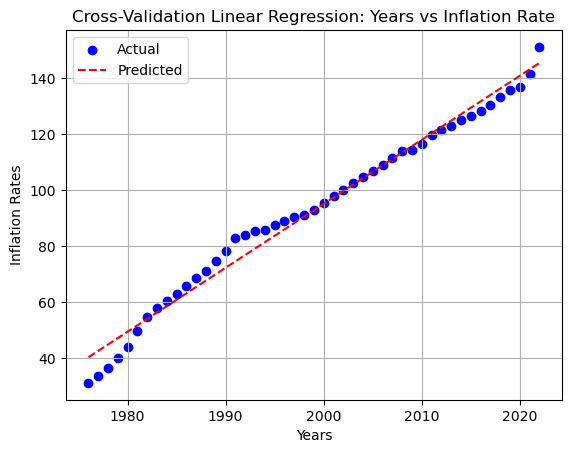

In [29]:
# Define features (years) and target (inflation rates)
X = np.array(years).reshape(-1, 1)
y = np.array(inflation_rates)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Initialize Linear Regression model
model = LinearRegression()

# Perform time series cross-validation
mse_scores = []

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Initialize an empty array to store all predicted values
all_predicted_values = np.array([])

#Initialze test and training accuracy array
test_accuracy_array = []
training_accuracy_array = []

# Perform time series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Calculate accuracy on training set
    training_accuracy = model.score(X_train, y_train)
    training_accuracy_array.append(training_accuracy)
    
    # Calculate accuracy on test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracy_array.append(test_accuracy)
    
    # Predict on testing data and store the predictions
    y_pred = model.predict(X_test)
    all_predicted_values = np.concatenate((all_predicted_values, y_pred))

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate average MSE across all folds
avg_mse = np.mean(mse_scores)
print("Average MSE:", avg_mse)

#Calculate average model accuracy
avg_test = np.mean(test_accuracy_array)
avg_train = np.mean(training_accuracy_array)
print (f'Regression score on training set: {avg_train}')
print (f'Regression score on test set: {avg_test}')

# Train the model on the entire dataset
model.fit(X, y)

# Predict on the entire dataset
y_pred_all = model.predict(X)

# Plot the model's predictions for the entire dataset
plt.plot(X, y_pred_all, color='red', linestyle='--', label='Predicted')

# Plot formatting
plt.title('Cross-Validation Linear Regression: Years vs Inflation Rate')
plt.xlabel('Years')
plt.ylabel('Inflation Rates')
plt.legend()
plt.grid(True)
plt.show()

The R^2 scores show that the model is probably overfitting the data. The training set being so accurate 

Text(0.5, 1.0, 'Residual Plot')

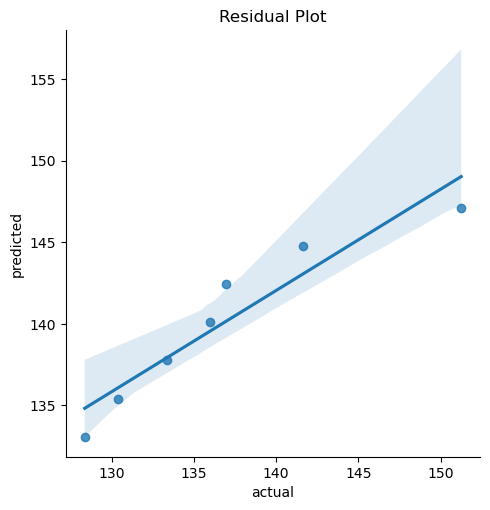

In [21]:
residuals = y_pred - y_test
residual_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'residual': residuals}) 
sns.lmplot(data=residual_df, x = "actual", y = "predicted")
plt.title("Residual Plot")